# 1.Importing Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'C:\Users\kamil\Documents\Instacart Basket Analysis'

In [5]:
complete_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))

# 3.Data Privacy


Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [6]:
#checking the names of the column to indentify any potential PII data columns
complete_data.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'Busiest day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spender_flag',
       'median_days_since_prior_order', 'frequency_flag', 'first_name',
       'surname', 'gender', 'state', 'age', 'date_joined', 'no_of_dependants',
       'marital_status', 'income'],
      dtype='object')

In [7]:
#dropping of name columns
complete_data = complete_data.drop(columns=['first_name', 'surname'])

In [8]:
complete_data.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'Unnamed: 0', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'Busiest day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price', 'spender_flag',
       'median_days_since_prior_order', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'no_of_dependants', 'marital_status', 'income'],
      dtype='object')

# 4.Creating Regions: Northeast, Midwest, South, West

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [9]:
#Creating region lists
northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [10]:
#Creating of the regional flags
complete_data.loc[complete_data['state'].isin(northeast), 'region']='Northeast'
complete_data.loc[complete_data['state'].isin(midwest), 'region']='Midwest'
complete_data.loc[complete_data['state'].isin(south), 'region']='South'
complete_data.loc[complete_data['state'].isin(west), 'region']='West'

In [11]:
#checking frequency
complete_data['region'].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

# 5.Comparing Regions

Determine whether there’s a difference in spending habits between the different U.S. regions.

In [12]:
#creating crosstab to compare region and spending flag
crosstab = pd.crosstab(complete_data['region'], complete_data['spender_flag'], dropna = False)

In [13]:
crosstab

spender_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


The South has more high spenders and more low spenders than all the other regions. 

In [14]:
#Number of states per region
complete_data.groupby('region')['state'].nunique()

region
Midwest      12
Northeast     9
South        17
West         13
Name: state, dtype: int64

In [15]:
#Number of customers per region
complete_data.groupby('region')['user_id'].nunique()

region
Midwest      48519
Northeast    36388
South        68737
West         52565
Name: user_id, dtype: int64

The south has more states in the region and more customers.

# 6.Creating Exclusion Flag

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [16]:
#Creating exclusion flag for low-activity customers: less than 5(0) and equal to or more than 5 (1)
complete_data.loc[complete_data['max_order']>=5, 'activity']='1'
complete_data.loc[complete_data['max_order']<5, 'activity']='0'

In [17]:
complete_data['activity'].value_counts(dropna=False)

1    30964564
0     1440295
Name: activity, dtype: int64

In [18]:
#Creating a dataset of customers with orders lower than 5
low_activity=complete_data[complete_data['activity']=='0']

In [19]:
low_activity

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income,region,activity
1510,520620,120,prior,1,3,11,0,196,2,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,0
1511,3273029,120,prior,3,2,8,19,196,2,1,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,0
1512,520620,120,prior,1,3,11,0,46149,1,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,0
1513,3273029,120,prior,3,2,8,19,46149,1,1,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,0
1514,520620,120,prior,1,3,11,0,26348,3,0,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404828,1947537,166751,prior,3,4,7,0,49001,1,1,...,Frequent customer,Female,Oregon,38,8/17/2018,1,married,41766,West,0
32404855,484769,66343,prior,1,6,11,0,47210,1,0,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,0
32404856,1561557,66343,prior,2,1,11,30,47210,1,1,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,0
32404857,276317,66343,prior,3,6,15,19,47210,1,1,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,0


In [20]:
low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customers.pkl'))

In [21]:
df_active=complete_data[complete_data['activity']=='1']

In [22]:
df_active

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income,region,activity
0,2539329,1,prior,1,2,8,0,196,1,0,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1
1,2398795,1,prior,2,3,7,15,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1
2,473747,1,prior,3,3,12,21,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1
3,2254736,1,prior,4,4,7,29,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1
4,431534,1,prior,5,4,15,28,196,1,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,prior,22,4,20,10,19675,1,1,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,1
32404851,2988973,106143,prior,23,2,22,5,19675,1,1,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,1
32404852,930,106143,prior,24,6,12,4,19675,1,1,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,1
32404853,467253,106143,prior,25,6,16,7,19675,1,1,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,1


# 7.Creating Customer Profiles


 Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

a) Age Profile

In [23]:
#Creating different age flag: young adult:18-25 years; adult: 26-64 years; seniors :65+ years;
df_active.loc[df_active['age']<=25, 'age_group']='Young Adult'
df_active.loc[(df_active['age']<65)&(df_active['age']>25), 'age_group']='Adult'
df_active.loc[df_active['age']>=65, 'age_group']='Senior'
df_active['age_group'].value_counts()

C:\Users\kamil\AppData\Local\Temp\ipykernel_10076\2726243014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['age']<=25, 'age_group']='Young Adult'


Adult          18904502
Senior          8195544
Young Adult     3864518
Name: age_group, dtype: int64

In [24]:
#aggregating for age group expenditure
df_active.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Adult        11.953327  1.0  99999.0
Senior       11.757768  1.0  99999.0
Young Adult  12.209359  1.0  99999.0

In [25]:
#aggregating for age group order frequency
df_active.groupby('age_group').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                     mean  min   max
age_group                                           
Adult                            9.355929  0.0  30.0
Senior                           9.306572  0.0  30.0
Young Adult                      9.315055  0.0  30.0

b) Income profile

In [26]:
df_active.loc[df_active['income']<40000, 'income_group']='low income'
df_active.loc[(df_active['income']>=40000)&(df_active['income']<150000), 'income_group']='middle income'
df_active.loc[df_active['income']>150000, 'income_group']='high income'
df_active['income_group'].value_counts(dropna=False)  

C:\Users\kamil\AppData\Local\Temp\ipykernel_10076\4008120810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['income']<40000, 'income_group']='low income'


middle income    25457264
high income       3894534
low income        1612025
NaN                   741
Name: income_group, dtype: int64

In [27]:
df_active.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
income_group                          
high income    32.620080  1.0  99999.0
low income      6.502895  1.0     25.0
middle income   9.112838  1.0  99999.0

In [28]:
#aggregating for income bracket order frequency
df_active.groupby('income_group').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                       mean  min   max
income_group                                          
high income                        9.177664  0.0  30.0
low income                        10.017196  0.0  30.0
middle income                      9.319271  0.0  30.0

c) Number of Dependents Profile

In [29]:
#Creating dependents flag: no_of_dependents>0- has dependents, otherwise - no dependents
df_active.loc[df_active['no_of_dependants'] >0, 'dependent_group']='has dependents'
df_active.loc[df_active['no_of_dependants'] ==0,'dependent_group']='no dependents'
df_active['dependent_group'].value_counts(dropna=False)

C:\Users\kamil\AppData\Local\Temp\ipykernel_10076\2621338105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.loc[df_active['no_of_dependants'] >0, 'dependent_group']='has dependents'


has dependents    23224883
no dependents      7739681
Name: dependent_group, dtype: int64

In [30]:
# aggregating for dependents bracket expenditure
df_active.groupby('dependent_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
dependent_group                         
has dependents   11.877157  1.0  99999.0
no dependents    12.102657  1.0  99999.0

In [31]:
#aggregating for dependents bracket order frequency
df_active.groupby('dependent_group').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                         mean  min   max
dependent_group                                         
has dependents                       9.344964  0.0  30.0
no dependents                        9.316159  0.0  30.0

d) Family Status Profile

In [32]:
df_active['marital_status'].value_counts()

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: marital_status, dtype: int64

In [33]:
df_active.groupby('marital_status').agg({'prices': ['mean', 'min', 'max']})


prices              
                                       mean  min      max
marital_status                                           
divorced/widowed                  11.532741  1.0  99999.0
living with parents and siblings  10.890167  1.0  99999.0
married                           11.944390  1.0  99999.0
single                            12.398586  1.0  99999.0

In [34]:
# aggregating for family status order frequency
df_active.groupby('marital_status').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                                          mean  min   max
marital_status                                                           
divorced/widowed                                      9.262268  0.0  30.0
living with parents and siblings                      9.256878  0.0  30.0
married                                               9.350965  0.0  30.0
single                                                9.344142  0.0  30.0

# 8.Creating Department Profiles

In [35]:
#importing departments_wrangled.csv
df_dept=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [36]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [37]:
#renaming unnamed column
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [38]:
#turning df_dept into data dictionary
zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [39]:
# mapping  department names to department id in dataframe
df_active['department'] = df_active['department_id'].map(data_dict)
df_active.head()

C:\Users\kamil\AppData\Local\Temp\ipykernel_10076\3270670537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['department'] = df_active['department_id'].map(data_dict)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,no_of_dependants,marital_status,income,region,activity,age_group,income_group,dependent_group,department
0,2539329,1,prior,1,2,8,0,196,1,0,...,2/17/2019,3,married,40423,South,1,Adult,middle income,has dependents,beverages
1,2398795,1,prior,2,3,7,15,196,1,1,...,2/17/2019,3,married,40423,South,1,Adult,middle income,has dependents,beverages
2,473747,1,prior,3,3,12,21,196,1,1,...,2/17/2019,3,married,40423,South,1,Adult,middle income,has dependents,beverages
3,2254736,1,prior,4,4,7,29,196,1,1,...,2/17/2019,3,married,40423,South,1,Adult,middle income,has dependents,beverages
4,431534,1,prior,5,4,15,28,196,1,1,...,2/17/2019,3,married,40423,South,1,Adult,middle income,has dependents,beverages


#### Department profiles will be based on the following departments: babies, alcohol, & pets.

a) Baby profile

In [40]:
#Creating baby flag: bought baby supplies(1)/didn't buy baby supplies (0). 
df_active['baby_status'] = [1 if x == 'babies' else 0 for x in df_active['department']]
df_active['baby_status']=df_active.groupby(['user_id'])['baby_status'].transform(np.max)
df_active['baby_status'].value_counts(dropna=False)

C:\Users\kamil\AppData\Local\Temp\ipykernel_10076\2895261549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['baby_status'] = [1 if x == 'babies' else 0 for x in df_active['department']]
C:\Users\kamil\AppData\Local\Temp\ipykernel_10076\2895261549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['baby_status']=df_active.groupby(['user_id'])['baby_status'].transform(np.max)


0    21154311
1     9810253
Name: baby_status, dtype: int64

In [41]:
df_active.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
baby_status                         
0            12.480604  1.0  99999.0
1            10.753821  1.0  99999.0

In [42]:
#aggregating for baby_status bracket order frequency
df_active.groupby('baby_status').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                     mean  min   max
baby_status                                         
0                               10.011965  0.0  30.0
1                                7.883953  0.0  30.0

b) Pet Profile

In [43]:
#Creating pet flag: bought pet supplies(1)/didn't buy pet supplies (0). 
df_active['pet_status'] = [1 if x == 'pets' else 0 for x in df_active['department']]
df_active['pet_status']=df_active.groupby(['user_id'])['pet_status'].transform(np.max)
df_active['pet_status'].value_counts(dropna=False)

C:\Users\kamil\AppData\Local\Temp\ipykernel_10076\3615906627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['pet_status'] = [1 if x == 'pets' else 0 for x in df_active['department']]
C:\Users\kamil\AppData\Local\Temp\ipykernel_10076\3615906627.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['pet_status']=df_active.groupby(['user_id'])['pet_status'].transform(np.max)


0    27513213
1     3451351
Name: pet_status, dtype: int64

In [44]:
df_active.groupby('pet_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                 mean  min      max
pet_status                         
0           11.635643  1.0  99999.0
1           14.308121  1.0  99999.0

In [45]:
#aggregating for pet_status bracket order frequency
df_active.groupby('pet_status').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                    mean  min   max
pet_status                                         
0                               9.419749  0.0  30.0
1                               8.684205  0.0  30.0

c) alcohol profile

In [46]:
#Creating alcohol flag: bought alcohol(1)/didn't buy alcohol(0). 
df_active['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in df_active['department']]
df_active['alcohol_status']=df_active.groupby(['user_id'])['alcohol_status'].transform(np.max)
df_active['alcohol_status'].value_counts(dropna=False)

C:\Users\kamil\AppData\Local\Temp\ipykernel_10076\4209372794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in df_active['department']]
C:\Users\kamil\AppData\Local\Temp\ipykernel_10076\4209372794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active['alcohol_status']=df_active.groupby(['user_id'])['alcohol_status'].transform(np.max)


0    28634074
1     2330490
Name: alcohol_status, dtype: int64

In [47]:
#aggregating for alcohol_status bracket expenditure
df_active.groupby('alcohol_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
alcohol_status                         
0               10.979561  1.0  99999.0
1               23.654561  1.0  99999.0

In [48]:
#aggregating for alcohol_status bracket order frequency
df_active.groupby('alcohol_status').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                        mean  min   max
alcohol_status                                         
0                                   9.358180  0.0  30.0
1                                   9.086919  0.0  30.0

# 8.Customer Profile Vizualizations

Create an appropriate visualization to show the distribution of profiles.

In [49]:
#Creating a subset with unique customers
df_unique=df_active.drop_duplicates(subset='user_id')

In [50]:
df_unique

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,income,region,activity,age_group,income_group,dependent_group,department,baby_status,pet_status,alcohol_status
0,2539329,1,prior,1,2,8,0,196,1,0,...,40423,South,1,Adult,middle income,has dependents,beverages,0,0,0
59,2968173,15,prior,15,1,9,7,196,2,0,...,54313,Midwest,1,Senior,middle income,no dependents,beverages,0,0,0
131,2293453,19,prior,2,5,14,6,196,3,0,...,151988,South,1,Adult,high income,has dependents,beverages,0,0,0
335,1573906,21,prior,10,3,10,6,196,2,0,...,124643,West,1,Senior,middle income,no dependents,beverages,0,0,1
540,1593000,31,prior,10,3,8,7,196,17,0,...,52311,South,1,Adult,middle income,has dependents,beverages,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404782,149359,178074,prior,1,1,15,0,19318,1,0,...,37731,South,1,Adult,low income,no dependents,pantry,0,0,0
32404798,707001,11534,prior,1,3,12,0,42387,1,0,...,103023,South,1,Senior,middle income,no dependents,beverages,0,0,0
32404810,1280763,105857,prior,1,1,22,0,23767,1,0,...,48873,West,1,Adult,middle income,has dependents,alcohol,0,0,1
32404819,968657,120516,prior,1,2,9,0,8566,1,0,...,76190,West,1,Young Adult,middle income,no dependents,pantry,0,0,0


a) Age profile

Text(0, 0.5, 'Number of Customers')

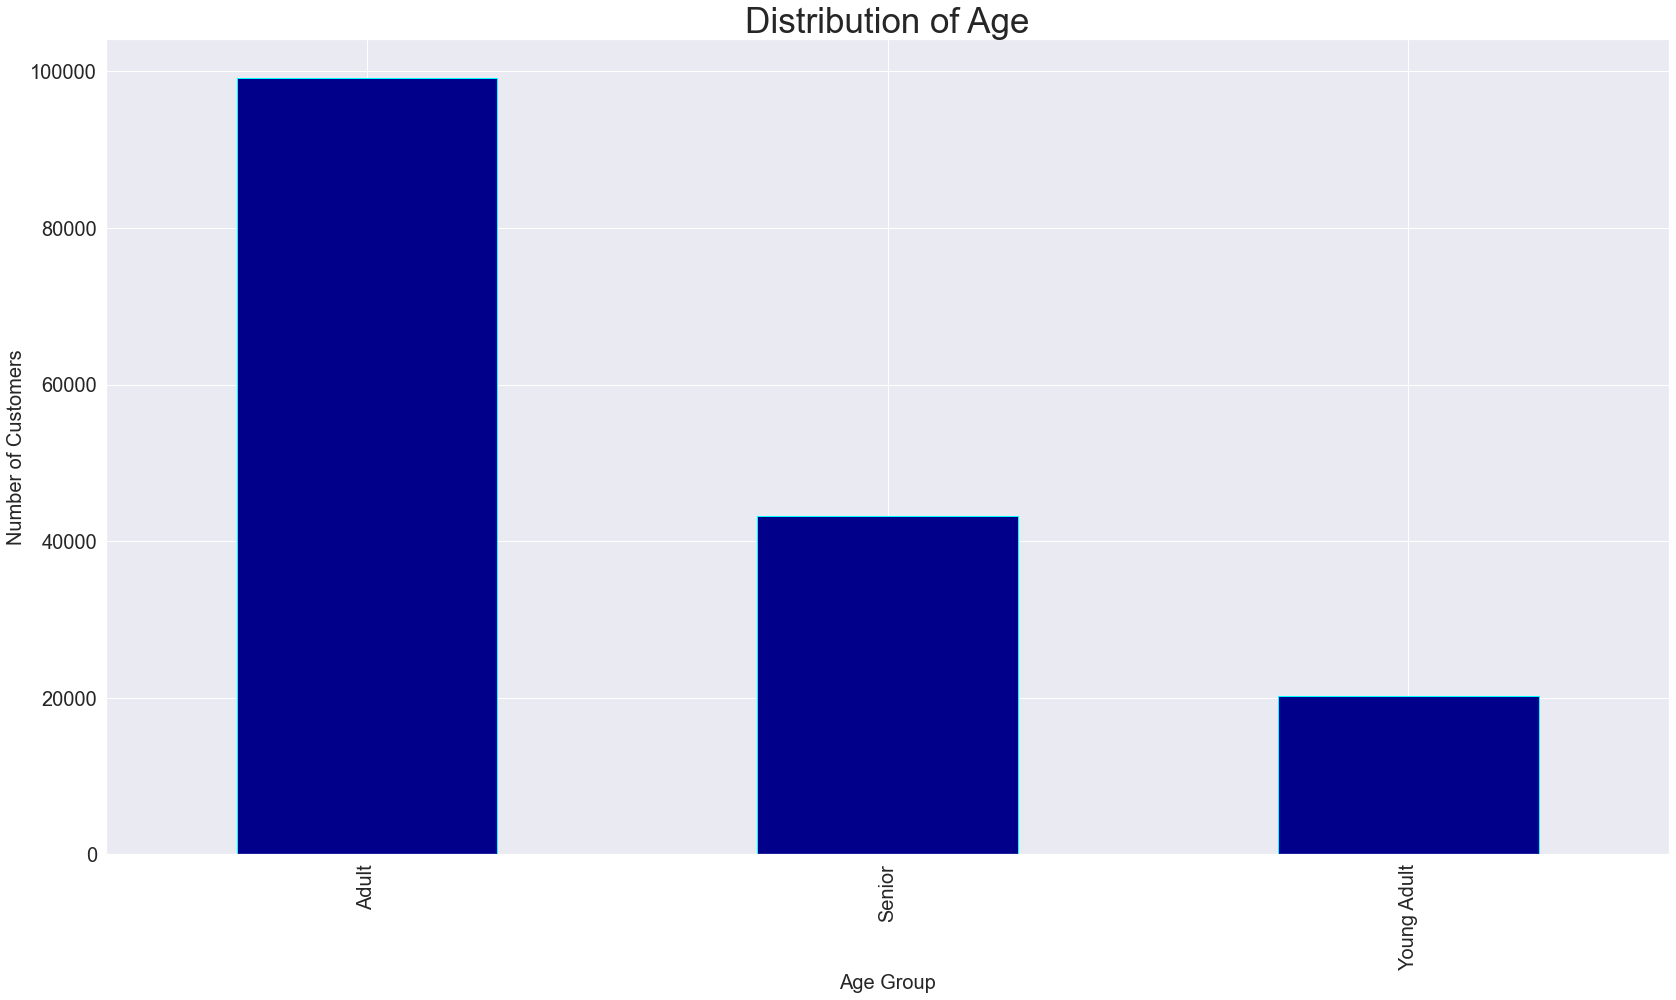

In [51]:
#Setting script figure size to 28,15
sns.set(rc = {'figure.figsize':(28,15)})
#Creating a bar chart for age distribution of customers
bar=df_unique['age_group'].value_counts().plot.bar(color='darkblue', edgecolor='cyan',fontsize=20)
plt.title('Distribution of Age', fontsize=35)
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Number of Customers', fontsize=20)

In [52]:
#exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_distribution.png'))

b) Income Profile

Text(0.5, 0, 'Number of Customers')

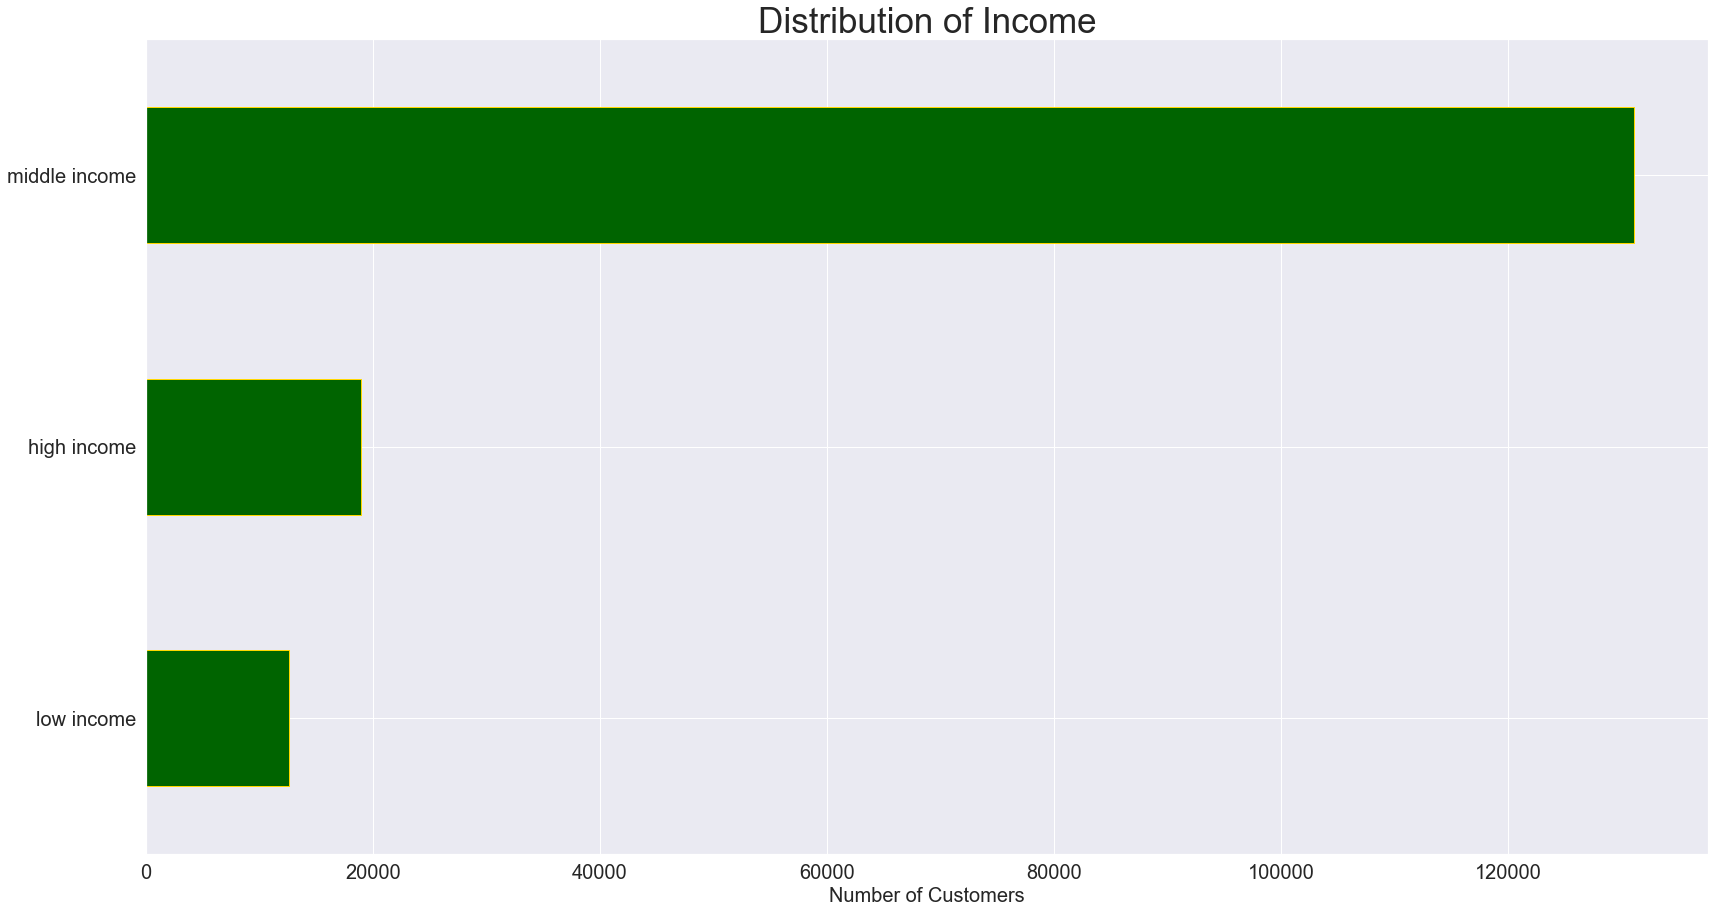

In [53]:
#creating a horizontal bar chart
income_bar=df_unique['income_group'].value_counts().sort_values().plot.barh(color='darkgreen', edgecolor='gold',fontsize=20)
plt.title('Distribution of Income', fontsize=35)
plt.xlabel('Number of Customers', fontsize=20)

In [54]:
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_distribution.png'))

c. Family Status & Dependents Profile

In [55]:
#Creating a crosstab for dependants and family status
depend=pd.crosstab(df_unique['marital_status'], df_unique['dependent_group'])
depend

dependent_group,has dependents,no dependents
marital_status,,
divorced/widowed,0,13831
living with parents and siblings,7608,0
married,114296,0
single,0,26896


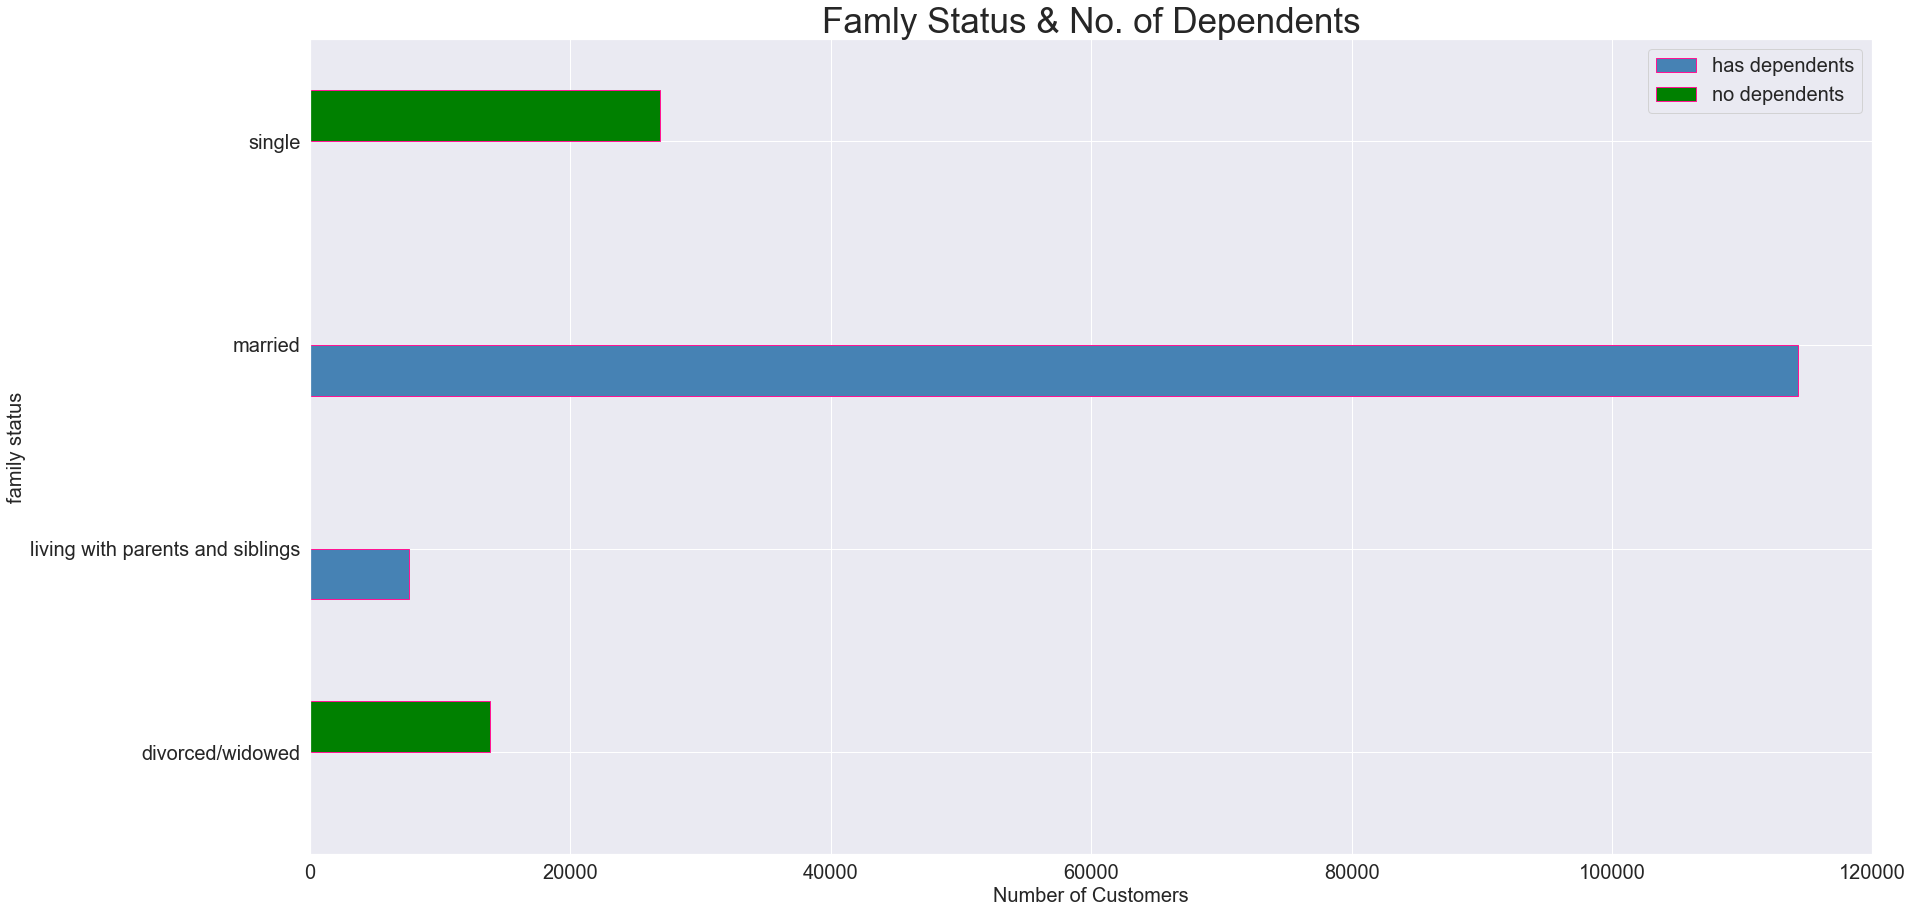

In [56]:
#creating a horizontal bar chart
depend_bar=depend.plot.barh(color=['steelblue','green'], edgecolor='deeppink',fontsize=20)
plt.title('Famly Status & No. of Dependents', fontsize=35)
plt.xlabel('Number of Customers', fontsize=20)
plt.ylabel('family status', fontsize=20)
plt.legend(fontsize=20)

In [57]:
depend_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_depend_famstatus_distribution.png'))

d) Baby Profile

In [58]:
df_unique['baby_status'].value_counts()

0    132401
1     30230
Name: baby_status, dtype: int64

0 means they have not purchased baby supplies and 1 means they have purchased baby supplies

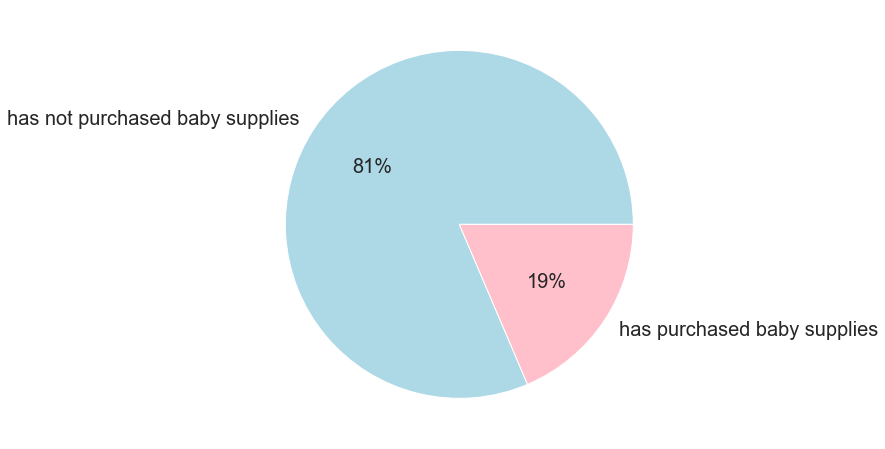

In [59]:
sns.set(rc = {'figure.figsize':(18,8)})
#Creating a pie chart for customers who have bought baby stuff
baby_pie=df_unique['baby_status'].value_counts().plot.pie(label='', labels=['has not purchased baby supplies', 'has purchased baby supplies'],autopct=('%1.f%%'), colors=['lightblue','pink'], textprops={'fontsize': 20})

In [60]:
baby_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'baby_pie.png'))

e) Pet Profile

In [61]:
df_unique['pet_status'].value_counts()

0    149456
1     13175
Name: pet_status, dtype: int64

0 means they have not purchased pet supplies and 1 means they have purchased pet supplies

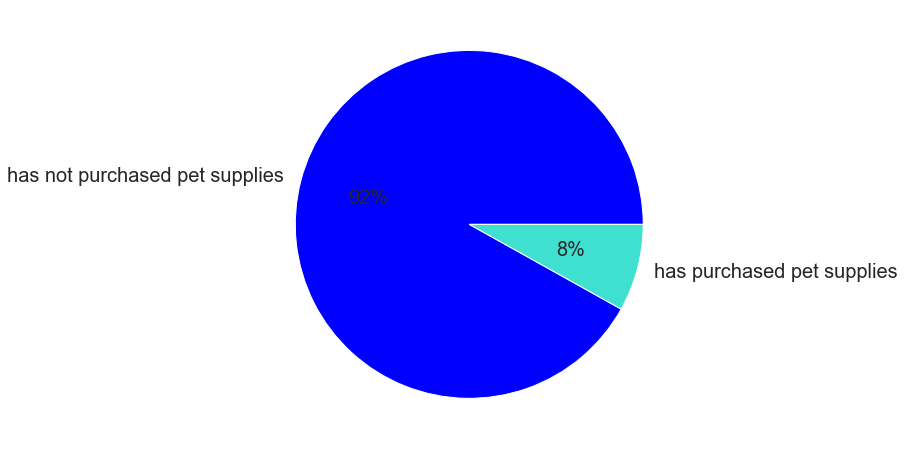

In [63]:
#Creating a pie chart for customers who have bought pet stuff
pet_pie=df_unique['pet_status'].value_counts().plot.pie(label='', labels=['has not purchased pet supplies', 'has purchased pet supplies'],autopct=('%1.f%%'), colors=['blue','turquoise'], textprops={'fontsize': 20})

In [64]:
#exporting pie chart
pet_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pet_pie.png'))

f) Alcohol Profile

In [65]:
df_unique['alcohol_status'].value_counts()

0    149480
1     13151
Name: alcohol_status, dtype: int64

0 means they have not purchased alcohol and 
1 means they have purchased alcohol

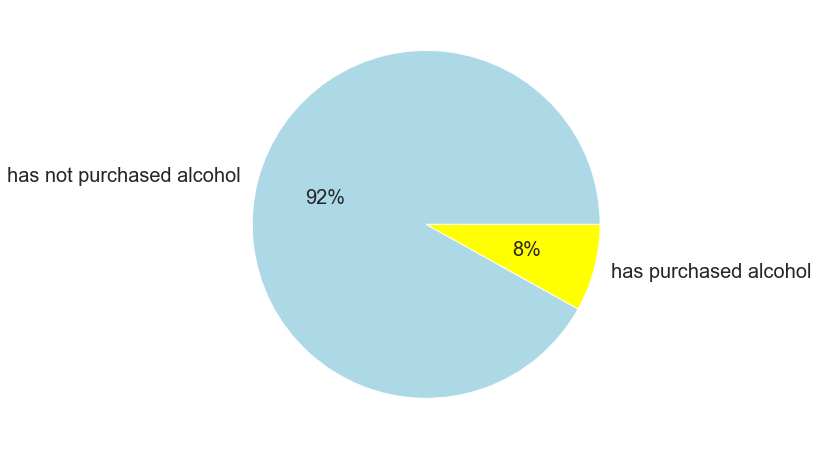

In [68]:
#Creating a pie chart for customers who have bought pet stuff
alcohol_pie=df_unique['alcohol_status'].value_counts().plot.pie(label='', labels=['has not purchased alcohol', 'has purchased alcohol'],autopct=('%1.f%%'), colors=['lightblue','yellow'], textprops={'fontsize': 20})

In [69]:
#exporting pie chart
alcohol_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'alcohol_pie.png'))

# 9.Comparison Visualizations

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

a) Region Distributions

In [71]:
#creating crosstab for region and age group
age_region=pd.crosstab(index=df_unique['region'], columns=df_unique['age_group'], normalize="index")
#creating cross tab to display labels
age_region_labels=pd.crosstab(index=df_unique['region'],columns=df_unique['age_group'])

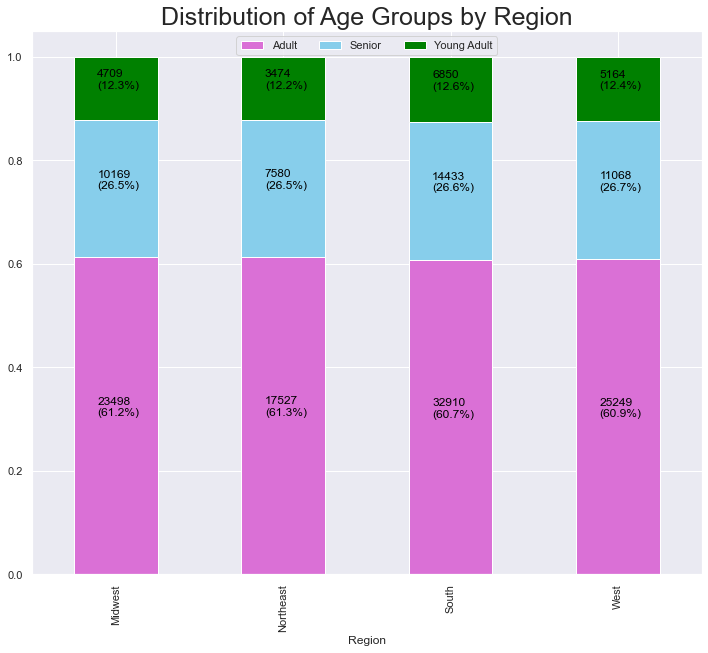

In [76]:
#creating stacked bar chart for age_region distribution
age_region_dist=age_region.plot(kind='bar', 
                        stacked=True, 
                        color=['orchid','skyblue','green'], 
                        figsize=(12,10))

plt.title('Distribution of Age Groups by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Region")


for n, y in enumerate([*age_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_region.loc[y],
                                         age_region_labels.loc[y],
                                          age_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [77]:
#exporting stacked bar chart
age_region_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_stacked.png'))

In [78]:
#creating crosstab for region and income group
income_region=pd.crosstab(index=df_unique['region'], columns=df_unique['income_group'], normalize="index")
#creating cross tab to display labels
income_region_labels=pd.crosstab(index=df_unique['region'],columns=df_unique['income_group'])

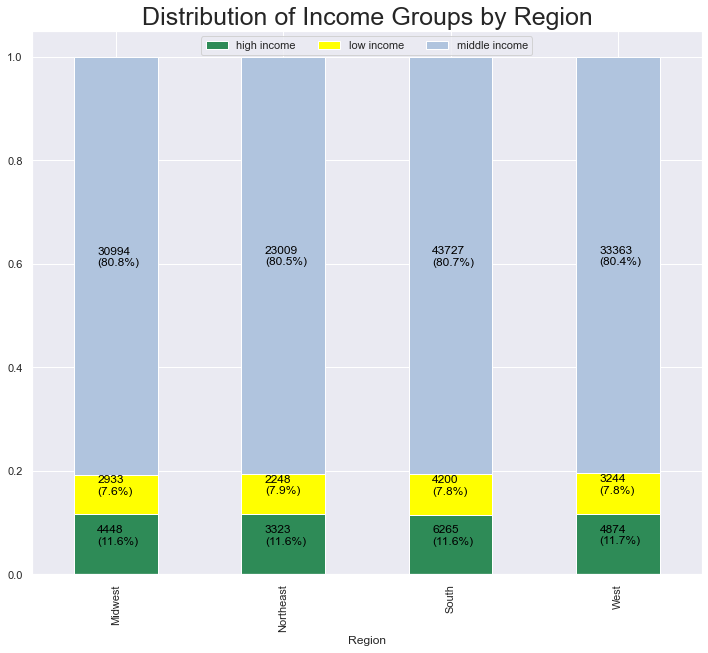

In [79]:
#creating stacked bar chart for income_region distribution
income_region_dist=income_region.plot(kind='bar', 
                        stacked=True, 
                        color=['seagreen','yellow','lightsteelblue'], 
                        figsize=(12,10))

plt.title('Distribution of Income Groups by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")


for n, y in enumerate([*income_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_region.loc[y],
                                         income_region_labels.loc[y],
                                          income_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [81]:
#exporting stacked bar chart
income_region_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region_stacked.png'))

In [82]:
#creating crosstab for region and customer loyalty
loyalty_region=pd.crosstab(index=df_unique['region'], columns=df_unique['loyalty_flag'], normalize="index")
#creating cross tab to display labels
loyalty_region_labels=pd.crosstab(index=df_unique['region'],columns=df_unique['loyalty_flag'])

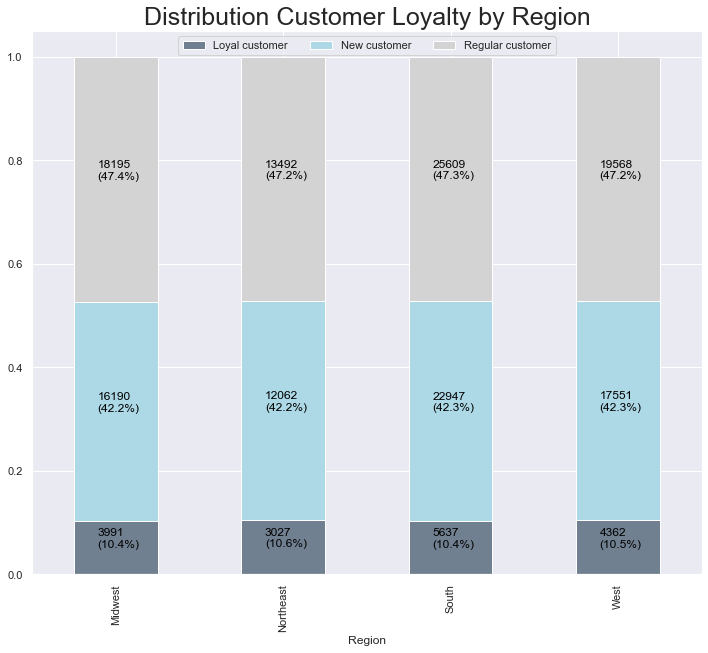

In [86]:
#creating stacked bar chart for loyalty_region distribution
loyalty_region_dist=loyalty_region.plot(kind='bar', 
                        stacked=True, 
                        color=['slategray','lightblue','lightgray'], 
                        figsize=(12,10))

plt.title('Distribution Customer Loyalty by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")


for n, y in enumerate([*loyalty_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(loyalty_region.loc[y],
                                         loyalty_region_labels.loc[y],
                                          loyalty_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [87]:
#exporting stacked bar chart
loyalty_region_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_region_stacked.png'))

In [88]:
#creating crosstab for region and product price range purchases
price_range_region=pd.crosstab(index=df_unique['region'], columns=df_unique['price_range_loc'], normalize="index")
#creating cross tab to display labels
price_range_region_labels=pd.crosstab(index=df_unique['region'],columns=df_unique['price_range_loc'])

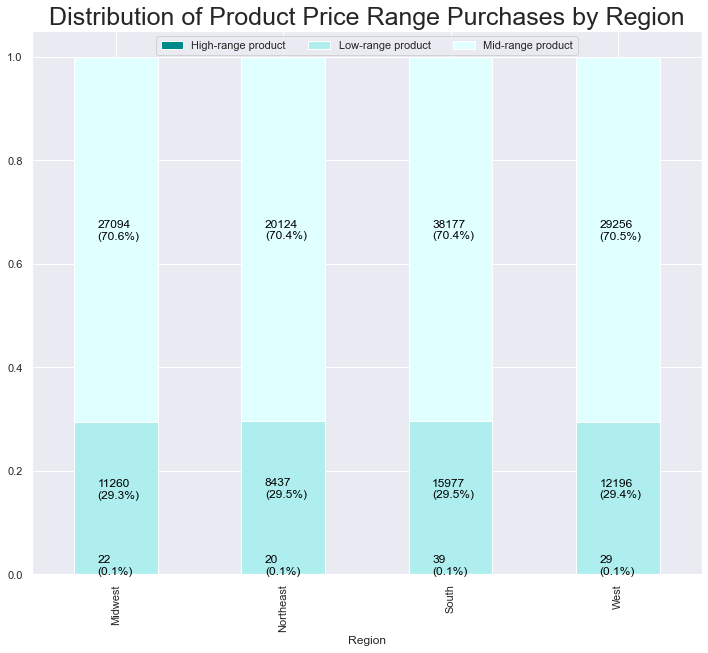

In [89]:
#creating stacked bar chart for price_range_region distribution
price_range_region_dist=price_range_region.plot(kind='bar', 
                        stacked=True, 
                        color=['darkcyan','paleturquoise','lightcyan'], 
                        figsize=(12,10))

plt.title('Distribution of Product Price Range Purchases by Region', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Region")


for n, y in enumerate([*price_range_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(price_range_region.loc[y],
                                         price_range_region_labels.loc[y],
                                          price_range_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [90]:
#exporting stacked bar chart
price_range_region_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_region_stacked.png'))

In [91]:
#creating crosstab for region and department
dept_region=pd.crosstab(index=df_unique['department'], columns=df_unique['region'], normalize="index")
#creating cross tab to display labels
dept_region_labels=pd.crosstab(index=df_unique['department'],columns=df_unique['region'])

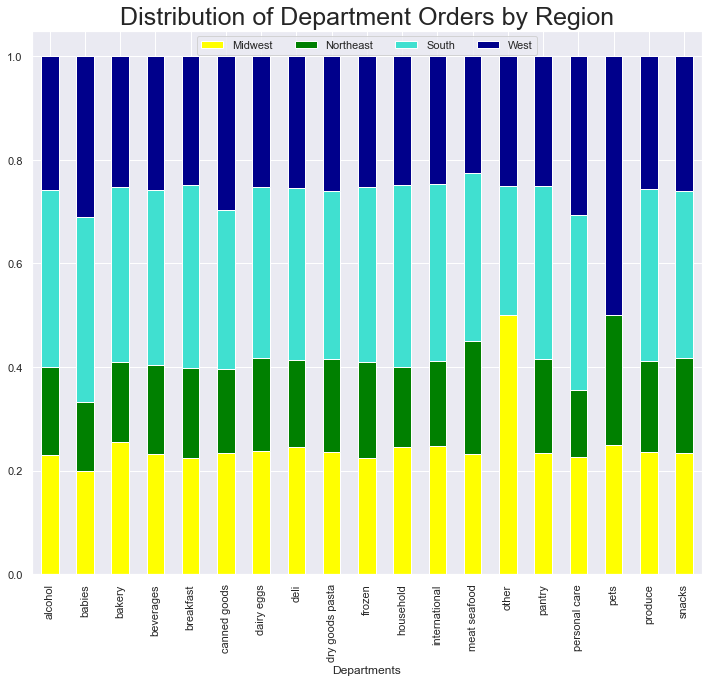

In [93]:
#creating stacked bar chart for dept_region distribution
dept_region_dist=dept_region.plot(kind='bar', 
                        stacked=True, 
                        color=['yellow','green','turquoise','darkblue'], 
                        figsize=(12,10))

plt.title('Distribution of Department Orders by Region', fontsize=25)
plt.legend(loc="upper center", ncol=4)
plt.xlabel("Departments")

plt.show()

In [94]:
#exporting stacked bar chart
dept_region_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_region_stacked.png'))

b) Order Frequency Distributions


In [95]:
#creating crosstab for order frequency and income
income_frequency=pd.crosstab(index=df_unique['income_group'], columns=df_unique['frequency_flag'], normalize="index")
#creating cross tab to display labels
income_frequency_labels=pd.crosstab(index=df_unique['income_group'],columns=df_unique['frequency_flag'])

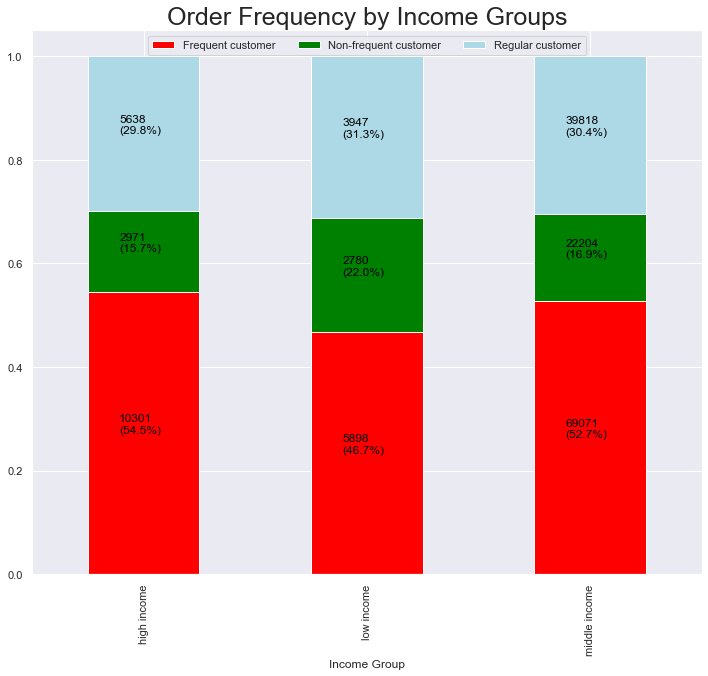

In [98]:
#creating stacked bar chart for income & order frequency
income_frequency_dist=income_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['red','green','lightblue'], 
                        figsize=(12,10))

plt.title('Order Frequency by Income Groups', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Income Group")


for n, y in enumerate([*income_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_frequency.loc[y],
                                         income_frequency_labels.loc[y],
                                          income_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [99]:
#exporting stacked bar chart
income_frequency_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_frequency_stacked.png'))

In [100]:
#creating crosstab for order frequency and age group
age_frequency=pd.crosstab(index=df_unique['age_group'], columns=df_unique['frequency_flag'], normalize="index")
#creating cross tab to display labels
age_frequency_labels=pd.crosstab(index=df_unique['age_group'],columns=df_unique['frequency_flag'])

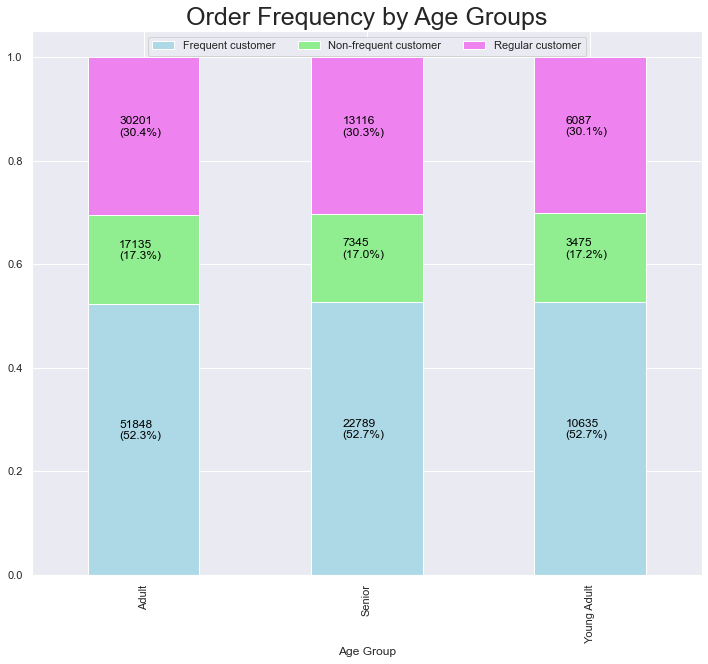

In [102]:
#creating stacked bar chart for age & order frequency
age_frequency_dist=age_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['lightblue','lightgreen','violet'], 
                        figsize=(12,10))

plt.title('Order Frequency by Age Groups', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Age Group")


for n, y in enumerate([*age_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(age_frequency.loc[y],
                                         age_frequency_labels.loc[y],
                                          age_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [103]:
#exporting stacked bar chart
age_frequency_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_frequency_stacked.png'))

In [106]:
#creating crosstab for order frequency and family status
family_frequency=pd.crosstab(index=df_unique['marital_status'], columns=df_unique['frequency_flag'], normalize="index")
#creating cross tab to display labels
family_frequency_labels=pd.crosstab(index=df_unique['marital_status'],columns=df_unique['frequency_flag'])

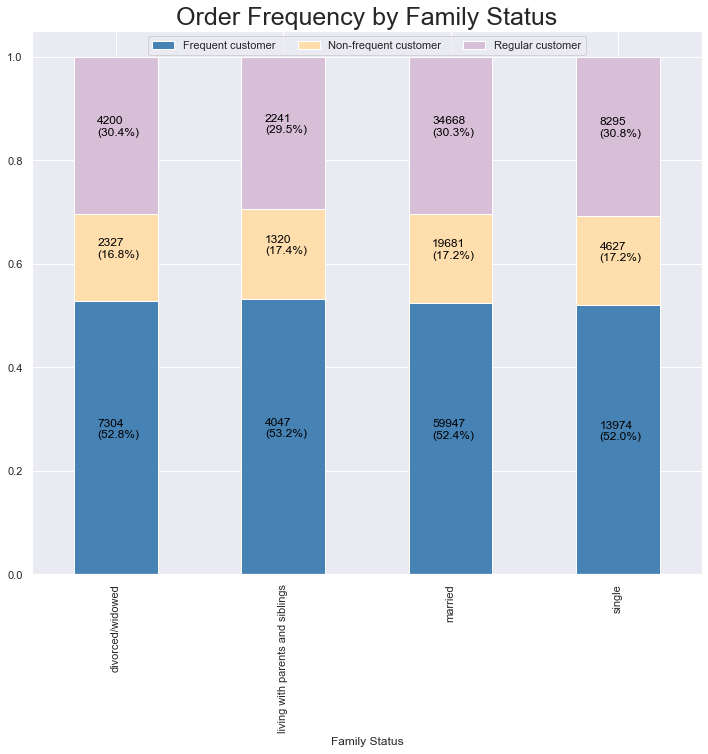

In [107]:
#creating stacked bar chart for family status & order frequency
family_frequency_dist=family_frequency.plot(kind='bar', 
                        stacked=True, 
                        color=['steelblue','navajowhite','thistle'], 
                        figsize=(12,10))

plt.title('Order Frequency by Family Status', fontsize=25)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Family Status")


for n, y in enumerate([*family_frequency_labels.index.values]):
    for (proportion, count, x_loc) in zip(family_frequency.loc[y],
                                         family_frequency_labels.loc[y],
                                          family_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [108]:
#exporting family_frequency_dist
family_frequency_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_frequency_stacked.png'))

# 10. Basic Visualisation

In [109]:
#defining function to show labels on charts
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

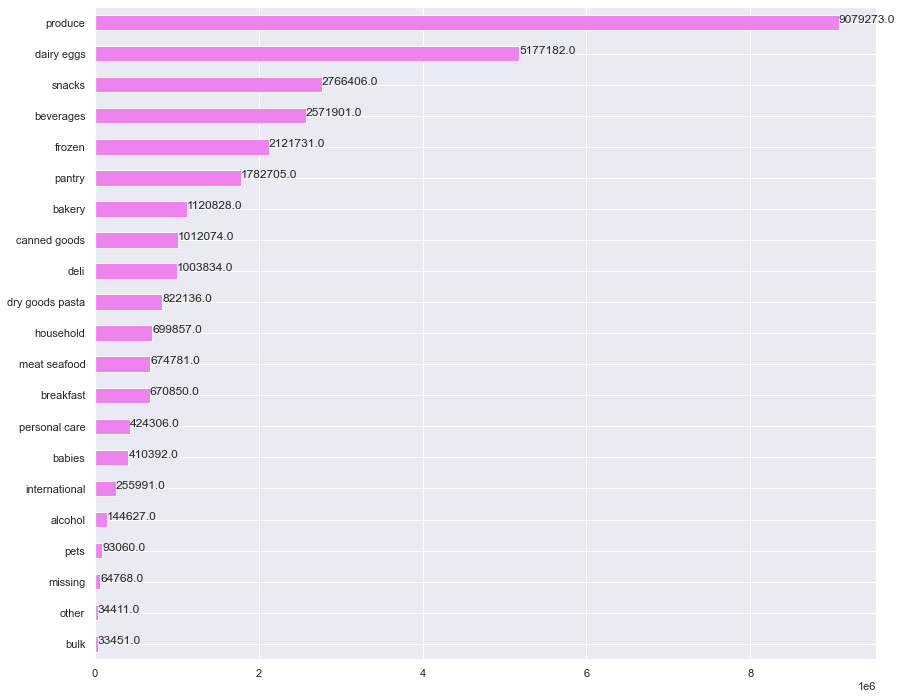

In [111]:
#creating bar chart for orders made from each department
department_bar=df_active.department.value_counts().sort_values().plot(kind = 'barh',color=['violet'],figsize=[14,12])
show_values(department_bar, "h", space=0)

In [112]:
#exporting horizontal bar chart
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar.png'))

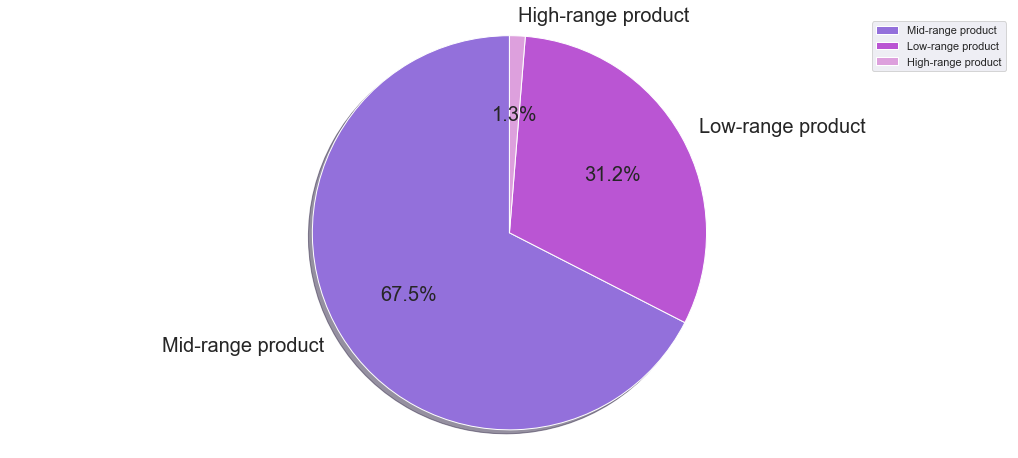

In [113]:
#creating pie chart for price range distribution
labels = 'Mid-range product', 'Low-range product', 'High-range product'
sizes = df_active['price_range_loc'].value_counts()
colors = ['mediumpurple','mediumorchid','plum']
textprops = {"fontsize":20}

price_pie, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.legend()
plt.show()

In [114]:
#exporting price_pie
price_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_pie.png'))

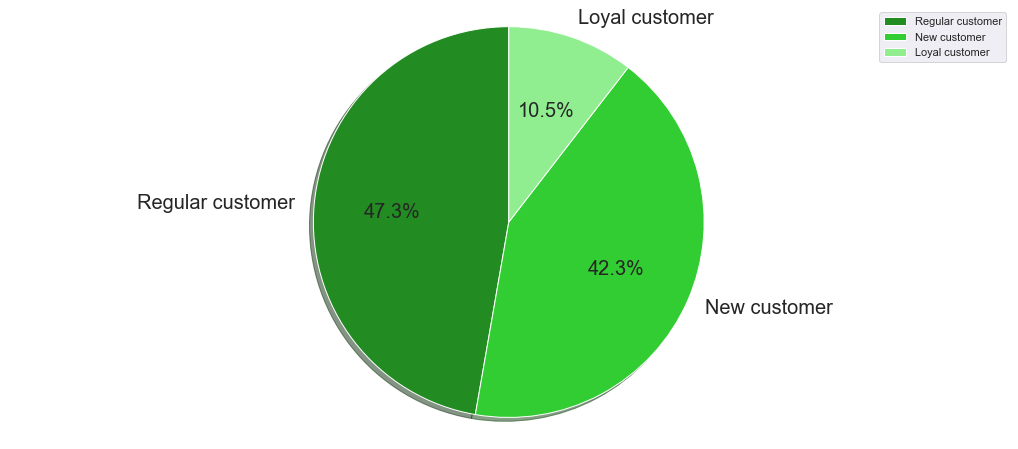

In [115]:
# Distribution of orders based on brand loyalty
labels = 'Regular customer', 'New customer', 'Loyal customer'
sizes = df_unique['loyalty_flag'].value_counts()
colors = ['forestgreen','limegreen','lightgreen']
textprops = {"fontsize":20}

loyalty_pie, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.legend()
plt.show()

In [116]:
#exporting loyalty_pie
loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_pie.png'))

In [117]:
df_unique['loyalty_flag'].value_counts()

Regular customer    76864
New customer        68750
Loyal customer      17017
Name: loyalty_flag, dtype: int64

In [118]:
#Difference in spending habits among customers based on loyalty flag
df_active.groupby(['loyalty_flag']).agg({'prices':['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal customer    10.386336  1.0  99999.0
New customer      13.387725  1.0  99999.0
Regular customer  12.495717  1.0  99999.0

In [120]:
#Difference in order frequency among customers based on loyalty flag
df_active.groupby(['loyalty_flag']).agg({'median_days_since_prior_order':['mean', 'min', 'max']})

median_days_since_prior_order           
                                          mean  min   max
loyalty_flag                                             
Loyal customer                        5.109445  0.0  14.0
New customer                         15.954754  0.0  30.0
Regular customer                     10.074591  0.0  30.0

# 11.Exporting Final Dataset

In [122]:
#exporting final dataset of active customers
df_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'full_instacart_data_final.pkl'))

In [123]:
#exporting final dataset of unique customers
df_unique.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'unique_dataset_for_profiles.pkl'))